<a href="https://colab.research.google.com/github/JasmineMamdouh/Breast_Cancer_Detection/blob/main/BreastCancerDetection__Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Libraries Imports

In [69]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

# Uploading & Analyzing Data

In [70]:
!pip install kaggle

In [71]:
from google.colab import drive
drive.mount ('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [72]:
!mkdir ~/.kaggle
!cp /content/drive/MyDrive/Colab_Notebooks/kaggle.json ~/.kaggle/kaggle.json
!chmod 600 ~/.kaggle/kaggle.json

mkdir: cannot create directory ‘/root/.kaggle’: File exists


In [73]:
!kaggle datasets download -d uciml/breast-cancer-wisconsin-data

Dataset URL: https://www.kaggle.com/datasets/uciml/breast-cancer-wisconsin-data
License(s): CC-BY-NC-SA-4.0
breast-cancer-wisconsin-data.zip: Skipping, found more recently modified local copy (use --force to force download)


In [74]:
!unzip breast-cancer-wisconsin-data.zip

Archive:  breast-cancer-wisconsin-data.zip
replace data.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: data.csv                


In [75]:
data = pd.read_csv('data.csv')

In [76]:
data.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [77]:
data.columns  #retrieve the col names of the dataset

Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst', 'Unnamed: 32'],
      dtype='object')

In [78]:
data.shape  #they are 33 cols and 569 instances

(569, 33)

In [79]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

# Data Pre_Processing

1. check for duplicates

In [80]:
data.duplicated().sum()

0

2. check for null cols

In [81]:
data.isnull().sum() #It is obvious that the col: Unnamed: 32 is all null values so must be dropped

,0
id,0
diagnosis,0
radius_mean,0
texture_mean,0
perimeter_mean,0
area_mean,0
smoothness_mean,0
compactness_mean,0
concavity_mean,0
concave points_mean,0


In [82]:
data.drop('id', axis = 1, inplace = True) #drop unique features
data.drop('Unnamed: 32', axis = 1, inplace = True)
data.columns

Index(['diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')

3. convert strings to numerical values

In [83]:
data["diagnosis"].value_counts()

,count
diagnosis,
B,357
M,212


In [84]:
data["diagnosis"].replace({"M": "1" , "B": "0"}, inplace = True)

In [85]:
data.head() #display the first 5 rows, you will see the diagnosis column is now with values 0 and 1 instead of M and B

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [86]:
data["diagnosis"].value_counts()

,count
diagnosis,
0,357
1,212


4. check for outliers

In [87]:
data.describe()
#comparing mean vs max value
#if the mean is so small compared to the max value, then max value is an outlier

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


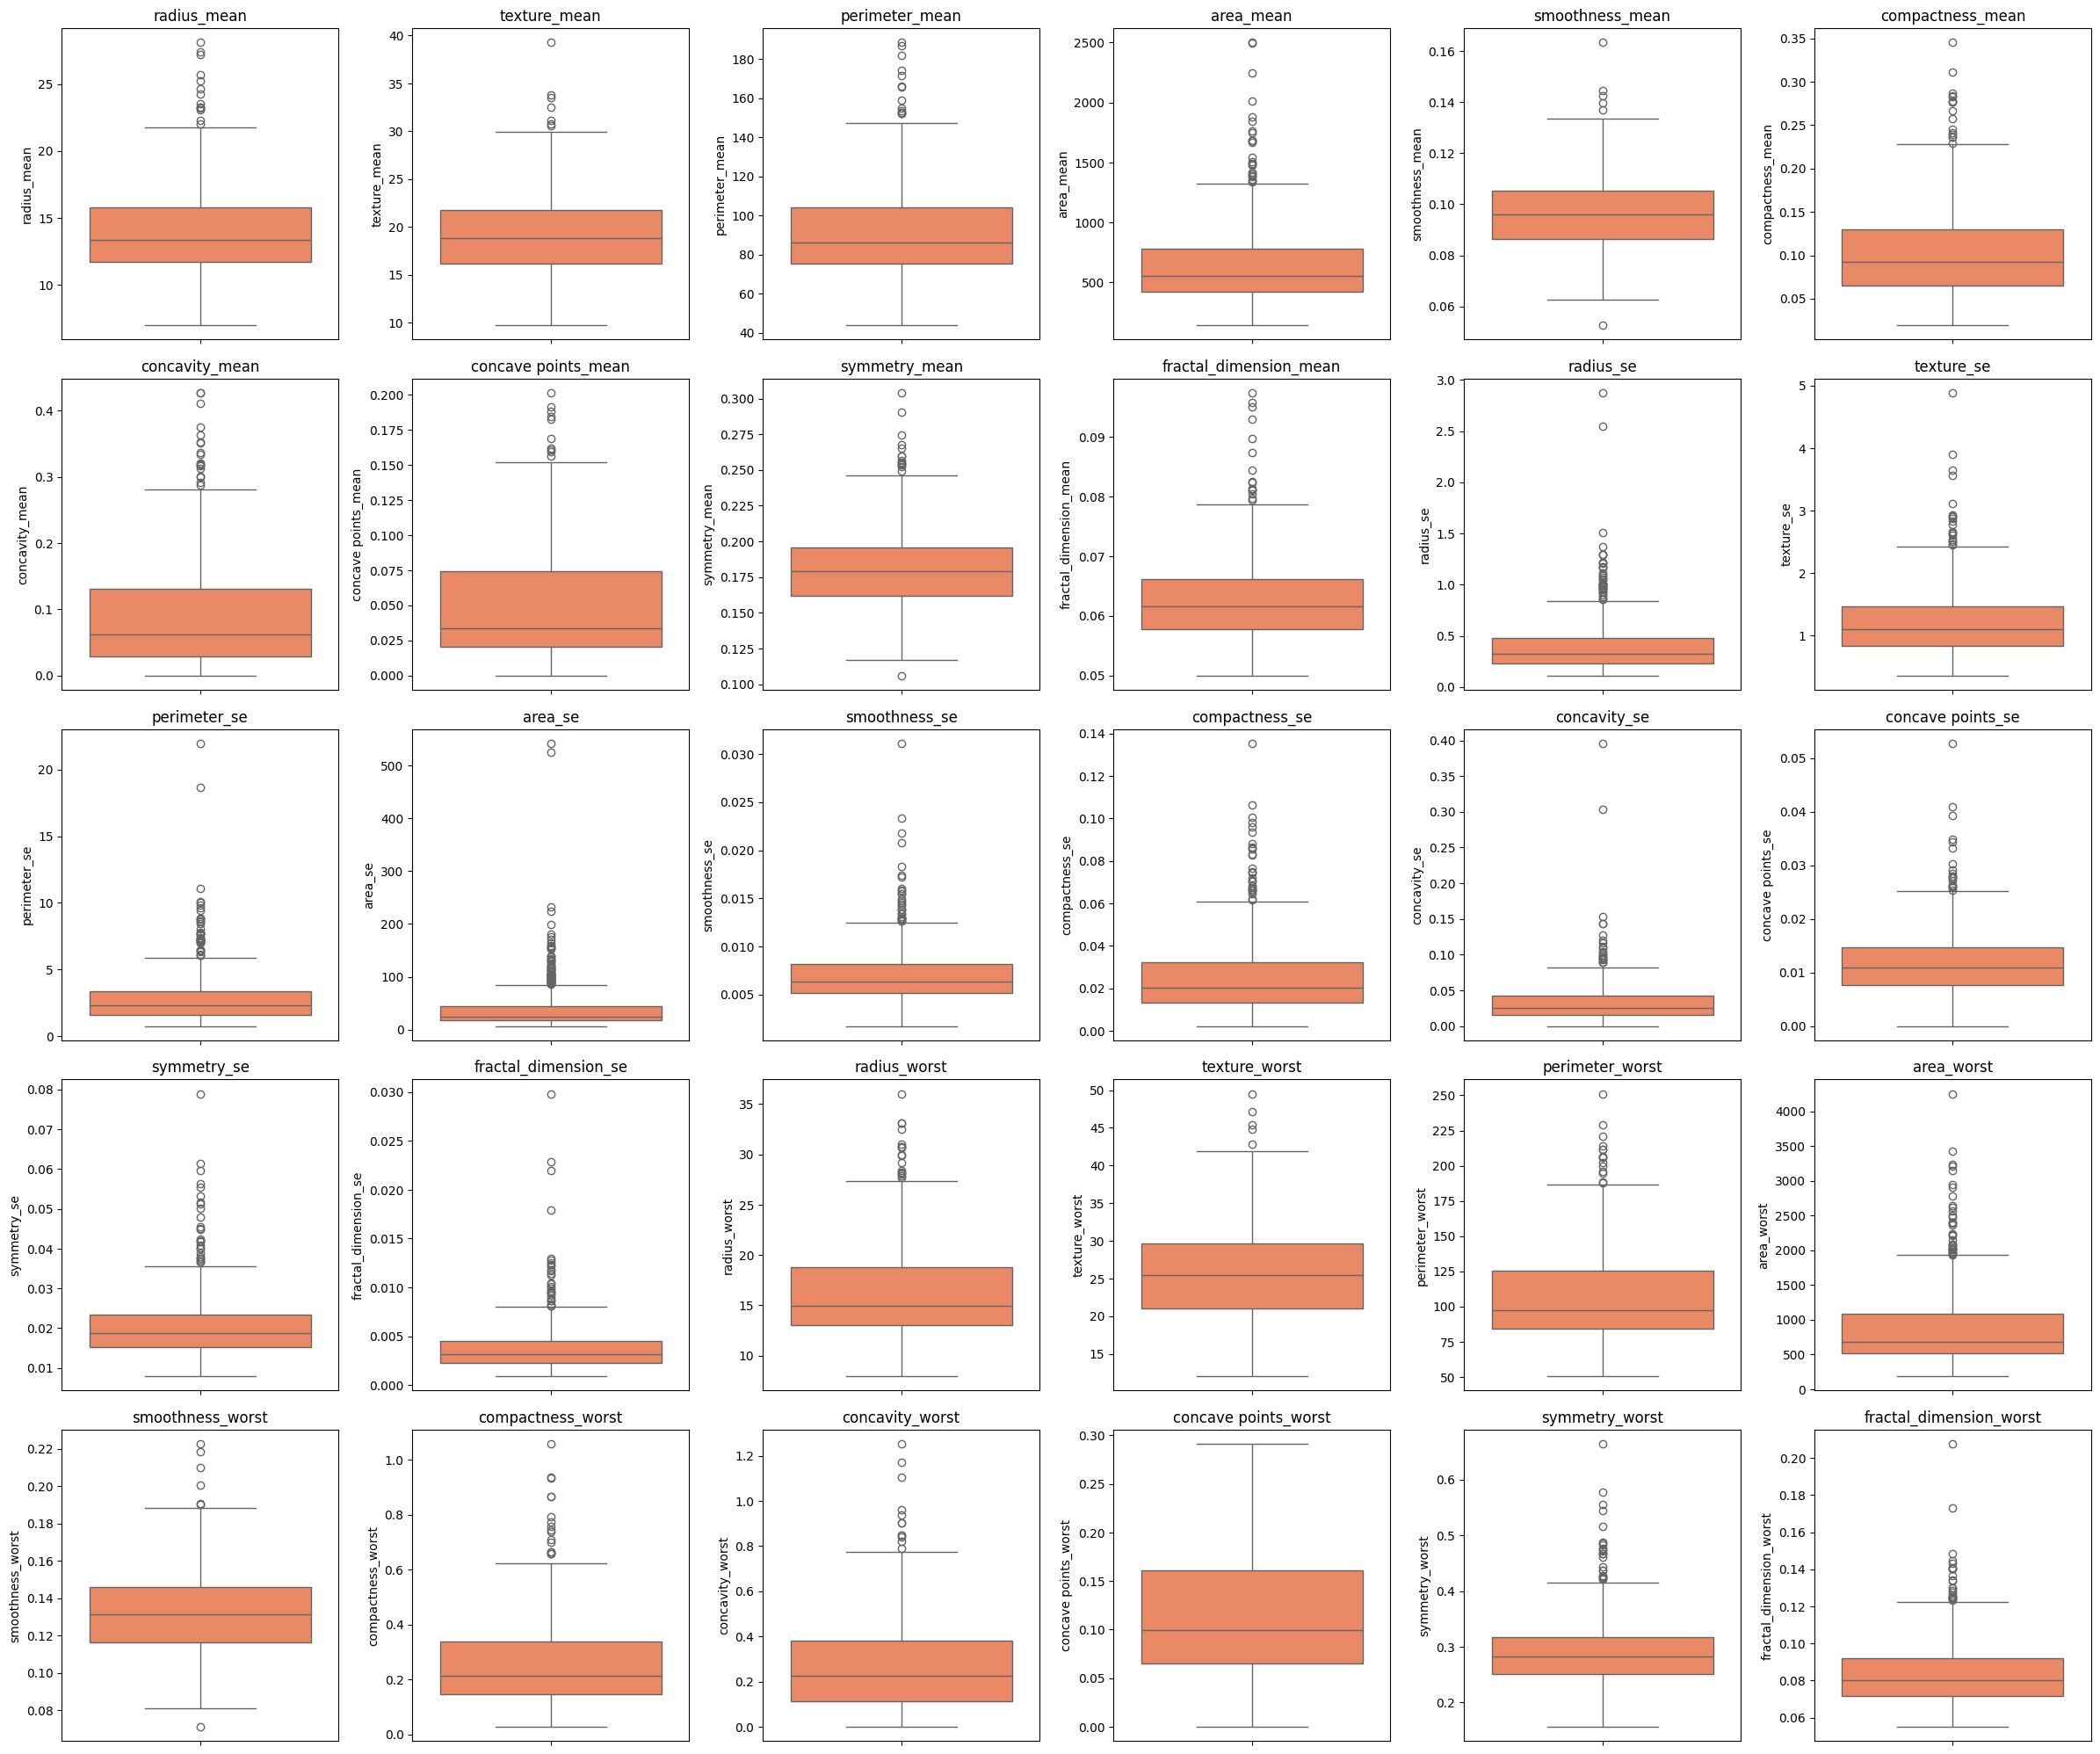

In [88]:
#to enhance readability, plot boxplot for each feature

plt.figure(figsize = (24,24))
numerical_columns = data.select_dtypes(include=['int64', 'float64']).columns
for i, col in enumerate(numerical_columns):
   #create a 6x6 grid of subplots, ensuring that each column gets a unique position in the grid
    plt.subplot(6, 6, i + 1)
    #create a boxplot showing distr of data
    sns.boxplot(data[col], color='#FF7F50')
    plt.title(col)

#adjust the layout of the subplots to ensure no overlapping
plt.tight_layout()

In [89]:
data.shape

(569, 31)

In [90]:
# Define the acceptable range for non-outliers
Q1 = data[numerical_columns].quantile(0.25)
Q3 = data[numerical_columns].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

#Remove outliers
data_no_outliers = data[~((data[numerical_columns] < lower_bound) | (data[numerical_columns] > upper_bound)).any(axis=1)]
data_no_outliers.shape  #removing 171 rows of outliers


(398, 31)

In [91]:
#outlier rows
print(data[((data[numerical_columns] < lower_bound) | (data[numerical_columns] > upper_bound)).any(axis=1)])

    diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0           1        17.99         10.38          122.80     1001.0   
1           1        20.57         17.77          132.90     1326.0   
2           1        19.69         21.25          130.00     1203.0   
3           1        11.42         20.38           77.58      386.1   
4           1        20.29         14.34          135.10     1297.0   
..        ...          ...           ...             ...        ...   
563         1        20.92         25.09          143.00     1347.0   
564         1        21.56         22.39          142.00     1479.0   
565         1        20.13         28.25          131.20     1261.0   
567         1        20.60         29.33          140.10     1265.0   
568         0         7.76         24.54           47.92      181.0   

     smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
0            0.11840           0.27760          0.3001              

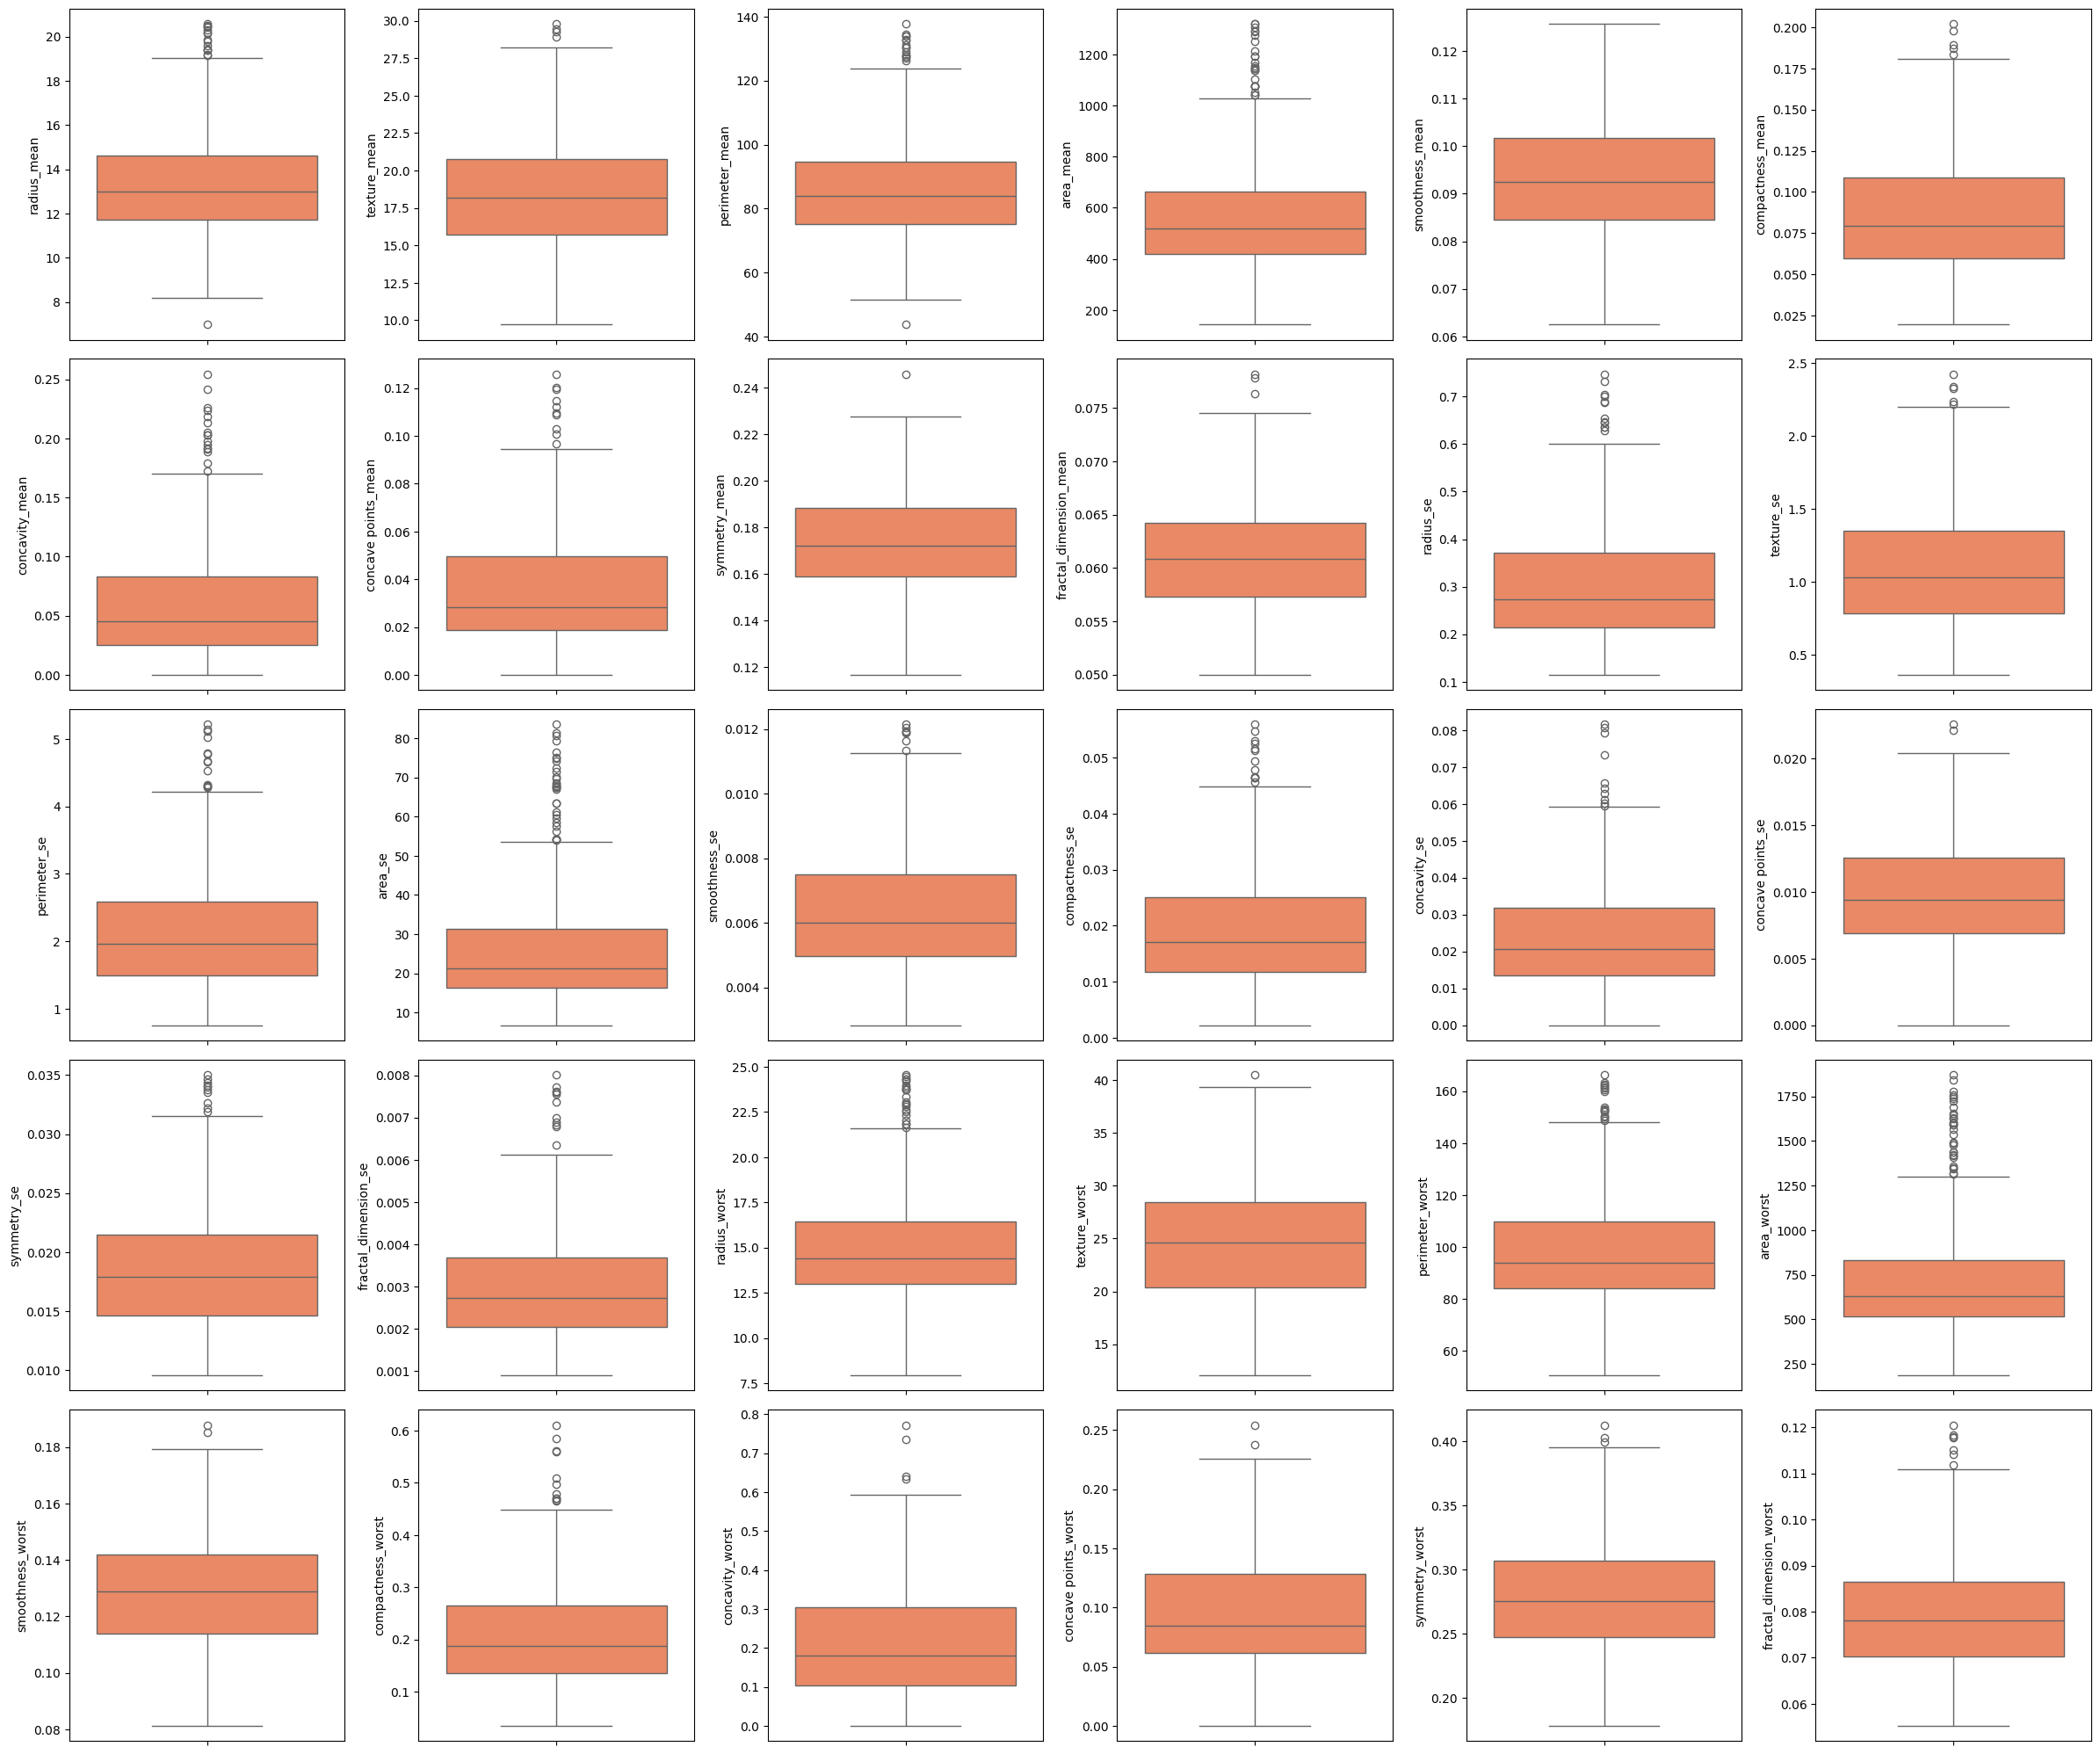

In [92]:
#boxplot for data with no outliers
plt.figure(figsize = (24,24))
numerical_columns = data_no_outliers.select_dtypes(include=['int64', 'float64']).columns
for i, col in enumerate(numerical_columns):
  plt.subplot(6, 6, i + 1)  # Create a subplot for each column
  sns.boxplot(data_no_outliers[col], color='#FF7F50') #37781c
plt.tight_layout()

5. Check features correlation


<Axes: >

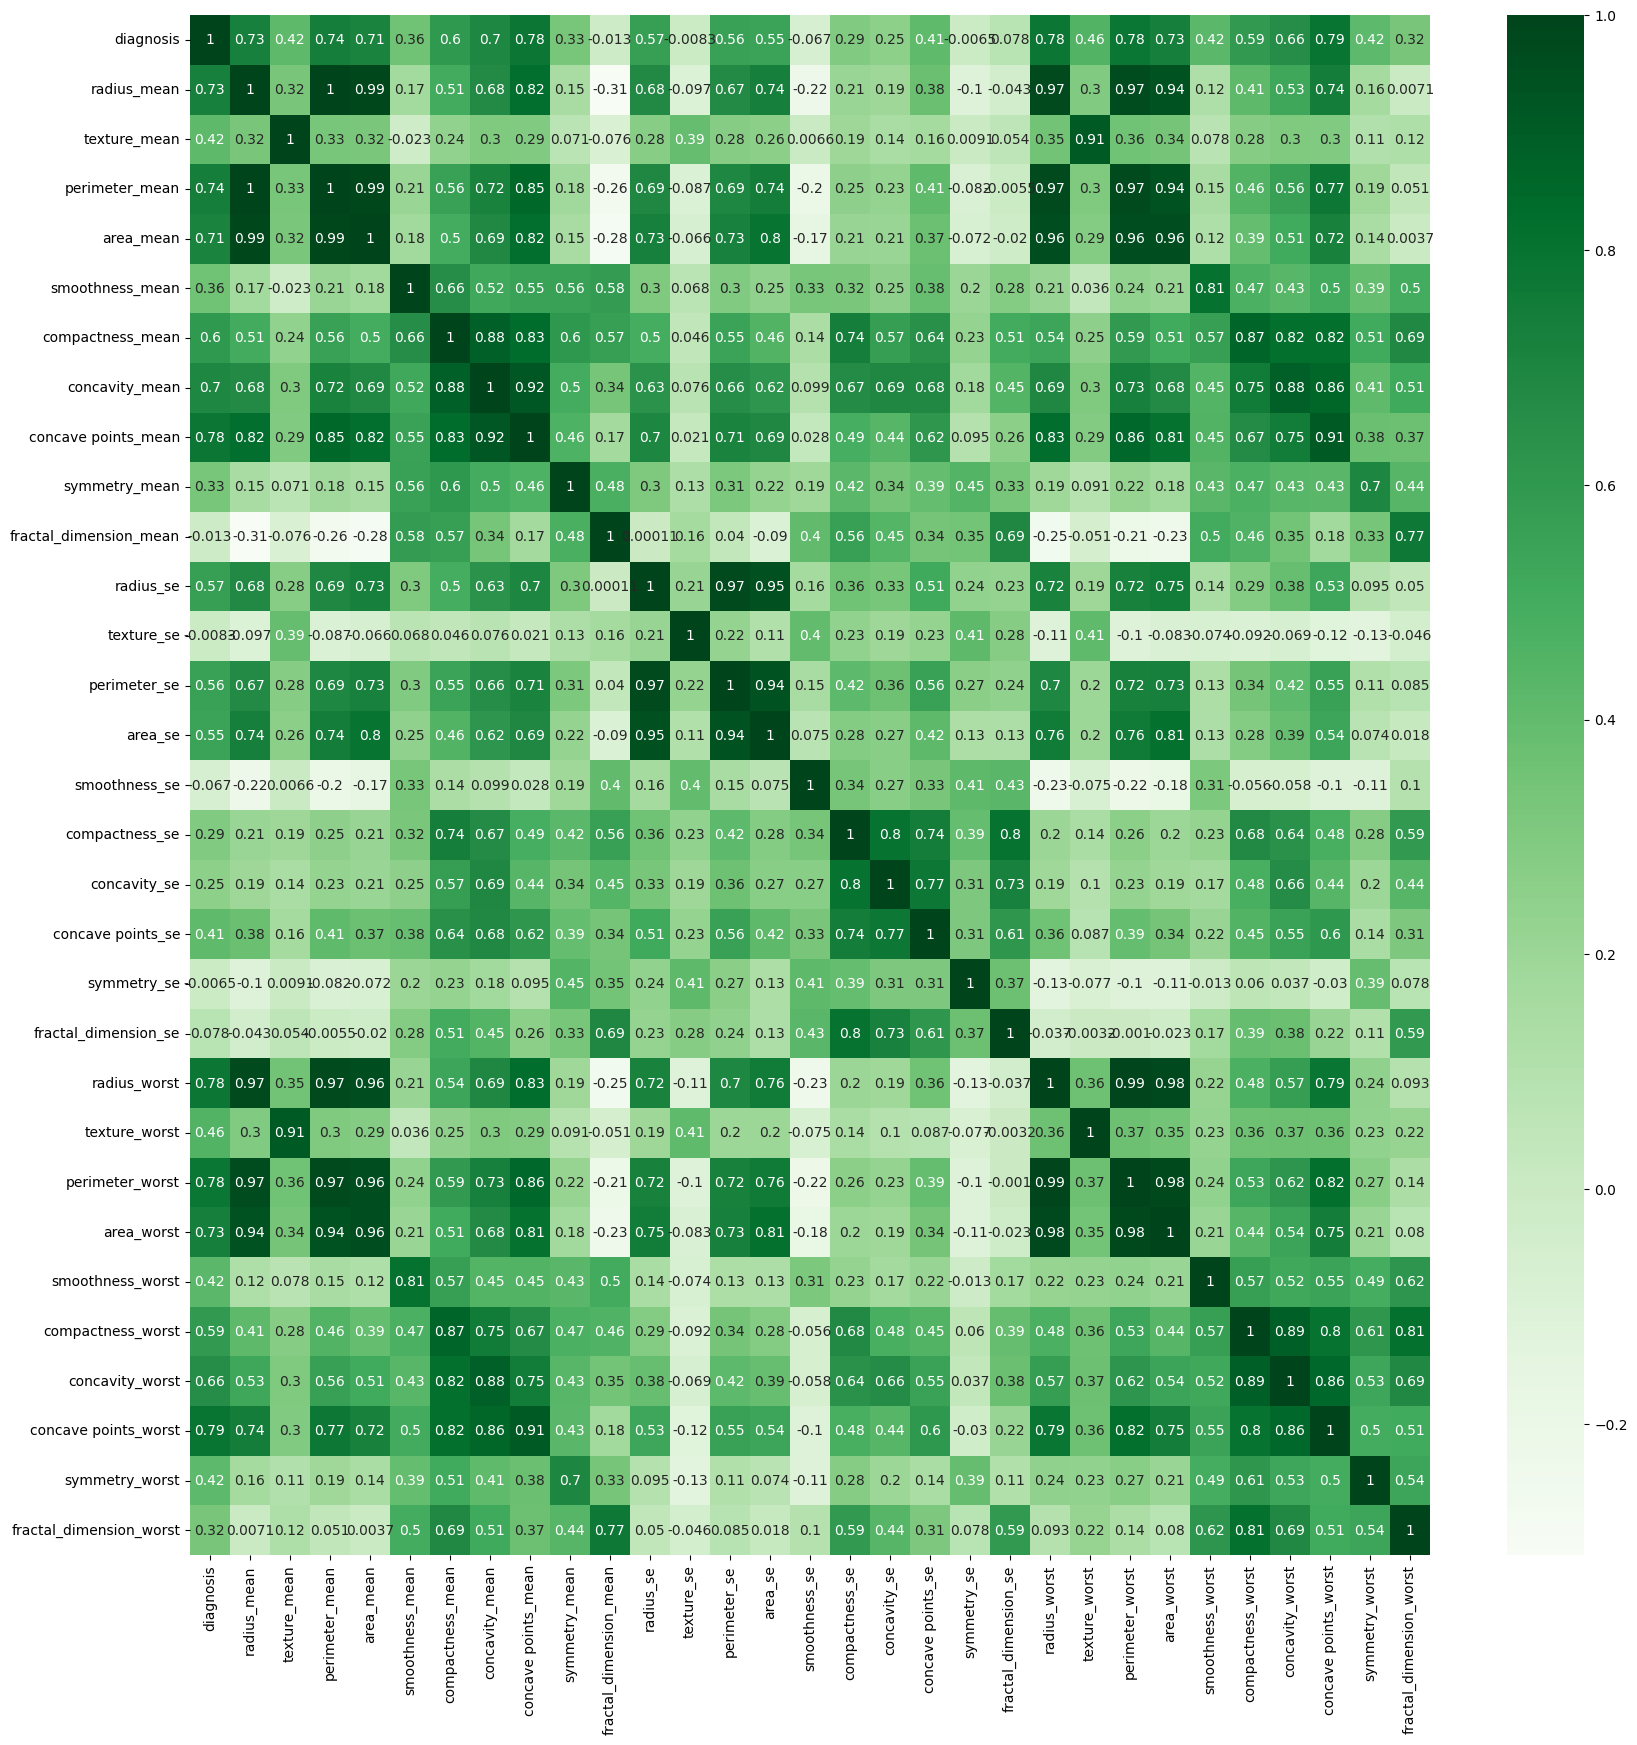

In [93]:
#heatmap showing the correlation of data 'relation of each col to other cols'
#cmap, for the colors package
plt.figure(figsize = (20,20))
sns.heatmap(data.corr(), annot = True, cmap = 'Greens')
#diagonal values represent the correlation or similarityof each feature with itself

# Data splitting & Standardization

##with outliers

In [94]:
x = data.drop(["diagnosis"], axis = 1)
y = data["diagnosis"]

In [95]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 101)

In [96]:
x_train

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
476,14.20,20.53,92.41,618.4,0.08931,0.11080,0.05063,0.03058,0.1506,0.06009,...,16.45,27.26,112.10,828.5,0.1153,0.3429,0.25120,0.13390,0.2534,0.07858
130,12.19,13.29,79.08,455.8,0.10660,0.09509,0.02855,0.02882,0.1880,0.06471,...,13.34,17.81,91.38,545.2,0.1427,0.2585,0.09915,0.08187,0.3469,0.09241
246,13.20,17.43,84.13,541.6,0.07215,0.04524,0.04336,0.01105,0.1487,0.05635,...,13.94,27.82,88.28,602.0,0.1101,0.1508,0.22980,0.04970,0.2767,0.07198
205,15.12,16.68,98.78,716.6,0.08876,0.09588,0.07550,0.04079,0.1594,0.05986,...,17.77,20.24,117.70,989.5,0.1491,0.3331,0.33270,0.12520,0.3415,0.09740
16,14.68,20.13,94.74,684.5,0.09867,0.07200,0.07395,0.05259,0.1586,0.05922,...,19.07,30.88,123.40,1138.0,0.1464,0.1871,0.29140,0.16090,0.3029,0.08216
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
552,12.77,29.43,81.35,507.9,0.08276,0.04234,0.01997,0.01499,0.1539,0.05637,...,13.87,36.00,88.10,594.7,0.1234,0.1064,0.08653,0.06498,0.2407,0.06484
393,21.61,22.28,144.40,1407.0,0.11670,0.20870,0.28100,0.15620,0.2162,0.06606,...,26.23,28.74,172.00,2081.0,0.1502,0.5717,0.70530,0.24220,0.3828,0.10070
75,16.07,19.65,104.10,817.7,0.09168,0.08424,0.09769,0.06638,0.1798,0.05391,...,19.77,24.56,128.80,1223.0,0.1500,0.2045,0.28290,0.15200,0.2650,0.06387
337,18.77,21.43,122.90,1092.0,0.09116,0.14020,0.10600,0.06090,0.1953,0.06083,...,24.54,34.37,161.10,1873.0,0.1498,0.4827,0.46340,0.20480,0.3679,0.09870


In [97]:
y_train

,diagnosis
476,0
130,0
246,0
205,1
16,1
...,...
552,0
393,1
75,1
337,1


Standardize both the training and test data so that they are on the same scale

In [98]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

In [99]:
x_train

array([[ 0.02090193,  0.28562106,  0.01889271, ...,  0.28708398,
        -0.59963793, -0.32285831],
       [-0.53400124, -1.40599342, -0.51656117, ..., -0.50392051,
         0.88583908,  0.43518026],
       [-0.2551693 , -0.43868901, -0.3137073 , ..., -0.99299632,
        -0.22946024, -0.68461207],
       ...,
       [ 0.53715513,  0.08001046,  0.48846929, ...,  0.56225563,
        -0.41534346, -1.1291307 ],
       [ 1.28254744,  0.49590463,  1.24364806, ...,  1.36496632,
         1.21947563,  0.77994255],
       [-0.11437297, -0.1466285 , -0.12892951, ...,  0.20346828,
        -0.09918311,  0.32007679]])

In [100]:
x_test

array([[-0.48706913, -0.17933928, -0.519373  , ..., -0.46515324,
         0.11370878, -0.69173752],
       [-0.02326947, -0.7774792 , -0.08675198, ..., -0.61550946,
        -0.29618755, -0.66488004],
       [-0.33522996, -0.69570226, -0.37797783, ..., -0.49662314,
         0.17884735, -0.82109189],
       ...,
       [-0.78522606, -1.38262858, -0.76078919, ..., -0.43946041,
        -1.28597597, -0.91153034],
       [ 0.20586965,  0.21085357,  0.16792001, ..., -0.20244792,
        -0.86178093, -1.01293101],
       [ 1.13070827, -0.1022353 ,  1.07493791, ...,  0.95144869,
        -0.15796669, -0.13650031]])

change the string numbers "1" , "0" to ints using LabelEncoder
as it assigns a numeric value to each unique label creating a numeric array which is required for the model

In [101]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y_train = le.fit_transform(y_train)


In [102]:
y_test = y_test.astype(y_train.dtype)

In [103]:
y_train

array([0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0,
       1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1,
       0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0,
       0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1,
       1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1,
       1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0,
       1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1,
       0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0,

In [104]:
y_test  #convert y_test to int64 instead of object

,diagnosis
107,0
437,0
195,0
141,1
319,0
...,...
19,0
313,0
139,0
495,0


## with no outliers

In [105]:
x_no_outliers = data_no_outliers.drop(["diagnosis"], axis = 1)
y_no_outliers = data_no_outliers["diagnosis"]

In [106]:
x_train_no_outliers, x_test_no_outliers, y_train_no_outliers, y_test_no_outliers = train_test_split(x_no_outliers, y_no_outliers, test_size = 0.2, random_state = 101)

In [107]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train_no_outliers = sc.fit_transform(x_train_no_outliers)
x_test_no_outliers = sc.transform(x_test_no_outliers)

In [108]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y_train_no_outliers = le.fit_transform(y_train_no_outliers)
y_test_no_outliers = y_test_no_outliers.astype(y_train_no_outliers.dtype)

# Models Building & Evaluation

##1. **Random Forest**



###with outliers

In [109]:
from sklearn.ensemble import RandomForestClassifier
rf_model = RandomForestClassifier(n_estimators = 100,  random_state=42)
#train the model using the training data
rf_model.fit(x_train, y_train)

#test the model using the training xarray and and get the predictions in y_pred
y_pred = rf_model.predict(x_test)

#Classification report
print('Classification report:')
print(classification_report(y_test, y_pred))

#Accuracy
rf_accuracy = accuracy_score(y_test, y_pred)
print(f'Random Forest Accuracy: {rf_accuracy * 100:.3f} %') #inc as n_estimators inc

Classification report:
              precision    recall  f1-score   support

           0       0.97      0.99      0.98        72
           1       0.98      0.95      0.96        42

    accuracy                           0.97       114
   macro avg       0.97      0.97      0.97       114
weighted avg       0.97      0.97      0.97       114

Random Forest Accuracy: 97.368 %


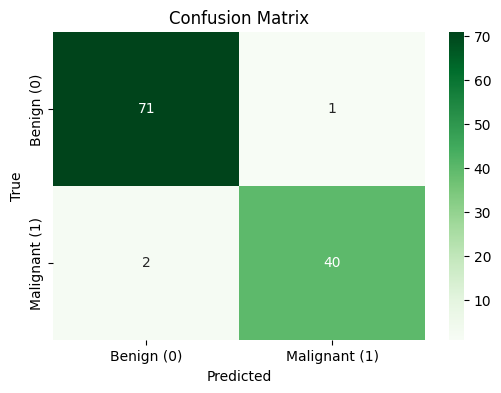

In [110]:
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Greens',
            xticklabels=['Benign (0)', 'Malignant (1)'],
            yticklabels=['Benign (0)', 'Malignant (1)'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()
#Darker shades represent higher values, and lighter shades represent lower values.

###No outliers

In [111]:
from sklearn.ensemble import RandomForestClassifier
rf_model = RandomForestClassifier(n_estimators = 100,  random_state=42)

rf_model.fit(x_train_no_outliers, y_train_no_outliers)
y_pred = rf_model.predict(x_test_no_outliers)

#Classification report
print('Classification report:')
print(classification_report(y_test_no_outliers, y_pred))

#Accuracy
rf_accuracy_no = accuracy_score(y_test_no_outliers, y_pred)
print(f'Random Forest Accuracy: {rf_accuracy_no * 100:.3f} %')


Classification report:
              precision    recall  f1-score   support

           0       0.92      0.97      0.94        58
           1       0.89      0.77      0.83        22

    accuracy                           0.91        80
   macro avg       0.91      0.87      0.89        80
weighted avg       0.91      0.91      0.91        80

Random Forest Accuracy: 91.250 %


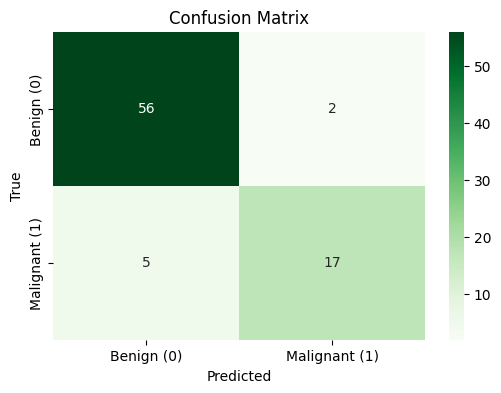

In [112]:
cm = confusion_matrix(y_test_no_outliers, y_pred)
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Greens',
            xticklabels=['Benign (0)', 'Malignant (1)'],
            yticklabels=['Benign (0)', 'Malignant (1)'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()
#Darker shades represent higher values, and lighter shades represent lower values.

##2. **Decision Tree**:

###with outliers

In [113]:
from sklearn.tree import DecisionTreeClassifier
dt_model = DecisionTreeClassifier(criterion='entropy', random_state=42)

dt_model.fit(x_train, y_train)
y_pred = dt_model.predict(x_test)

#Classification report
print('Classification report:')
print(classification_report(y_test, y_pred))

#Accuracy
dt_accuracy = accuracy_score(y_test, y_pred)
print(f'Decision Tree Accuracy: {dt_accuracy*100:.3f} %')
#inc by using entropy as criterion instead of gini

Classification report:
              precision    recall  f1-score   support

           0       0.93      0.93      0.93        72
           1       0.88      0.88      0.88        42

    accuracy                           0.91       114
   macro avg       0.91      0.91      0.91       114
weighted avg       0.91      0.91      0.91       114

Decision Tree Accuracy: 91.228 %


###No outliers

In [114]:
from sklearn.tree import DecisionTreeClassifier
dt_model = DecisionTreeClassifier(criterion='entropy', random_state=42)


dt_model.fit(x_train_no_outliers, y_train_no_outliers)
y_pred = dt_model.predict(x_test_no_outliers)

#Classification report
print('Classification report:')
print(classification_report(y_test_no_outliers, y_pred))

#Accuracy
dt_accuracy_no = accuracy_score(y_test_no_outliers, y_pred)
print(f'Random Forest Accuracy: {accuracy_score(y_test_no_outliers, y_pred)*100:.3f} %')

Classification report:
              precision    recall  f1-score   support

           0       0.92      0.95      0.93        58
           1       0.85      0.77      0.81        22

    accuracy                           0.90        80
   macro avg       0.88      0.86      0.87        80
weighted avg       0.90      0.90      0.90        80

Random Forest Accuracy: 90.000 %


##3. **Logistic Regression:**


###with outliers

In [115]:
#use the algorithm from the library directly, don't build it from scratch
# so you have no access to modify the layers, GD ,optimizer, ...
from sklearn.linear_model import LogisticRegression
lr_model = LogisticRegression()

lr_model.fit(x_train, y_train)
y_pred = lr_model.predict(x_test)

#Classification report
print('Classification report:')
print(classification_report(y_test, y_pred))

#Accuracy
lr_accuracy = accuracy_score(y_test, y_pred)
print(f'Logistic Regression Accuracy: {lr_accuracy*100:.3f} %')



Classification report:
              precision    recall  f1-score   support

           0       0.99      1.00      0.99        72
           1       1.00      0.98      0.99        42

    accuracy                           0.99       114
   macro avg       0.99      0.99      0.99       114
weighted avg       0.99      0.99      0.99       114

Logistic Regression Accuracy: 99.123 %


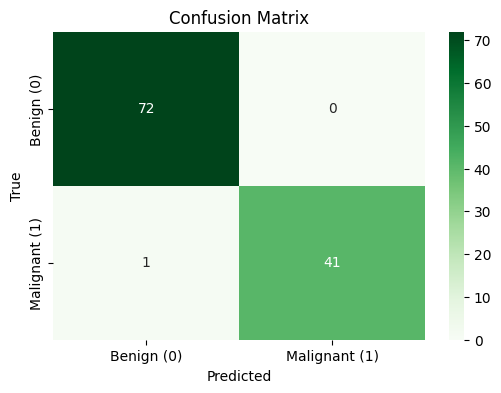

In [116]:
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Greens',
            xticklabels=['Benign (0)', 'Malignant (1)'],
            yticklabels=['Benign (0)', 'Malignant (1)'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()
#Darker shades represent higher values, and lighter shades represent lower values.

###No outliers

In [117]:
from sklearn.linear_model import LogisticRegression
lr_model = LogisticRegression()

lr_model.fit(x_train_no_outliers, y_train_no_outliers)
y_pred = lr_model.predict(x_test_no_outliers)

#Classification report
print('Classification report:')
print(classification_report(y_test_no_outliers, y_pred))

#Accuracy
lr_accuracy_no = accuracy_score(y_test_no_outliers, y_pred)
print(f'Logistic Regression Accuracy: {accuracy_score(y_test_no_outliers, y_pred)*100:.3f} %')


Classification report:
              precision    recall  f1-score   support

           0       0.92      0.98      0.95        58
           1       0.94      0.77      0.85        22

    accuracy                           0.93        80
   macro avg       0.93      0.88      0.90        80
weighted avg       0.93      0.93      0.92        80

Logistic Regression Accuracy: 92.500 %


##4. **Linear SVC**  

###with outliers

In [118]:
from sklearn.svm import LinearSVC
svc_model = LinearSVC()

svc_model.fit(x_train, y_train)
y_pred = svc_model.predict(x_test)

# Classification report
print('Classification report:')
print(classification_report(y_test, y_pred))

# Accuracy
svc_accuracy = accuracy_score(y_test, y_pred)
print(f'Linear SVC Accuracy: {svc_accuracy*100:.3f} %')

Classification report:
              precision    recall  f1-score   support

           0       0.96      0.96      0.96        72
           1       0.93      0.93      0.93        42

    accuracy                           0.95       114
   macro avg       0.94      0.94      0.94       114
weighted avg       0.95      0.95      0.95       114

Linear SVC Accuracy: 94.737 %


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


###No outliers

In [119]:
from sklearn.svm import LinearSVC
svc_model = LinearSVC()

svc_model.fit(x_train_no_outliers, y_train_no_outliers)
y_pred = svc_model.predict(x_test_no_outliers)

# Classification report
print('Classification report:')
print(classification_report(y_test_no_outliers, y_pred))

# Accuracy
svc_accuracy_no = accuracy_score(y_test_no_outliers, y_pred)
print(f'Linear SVC Accuracy: {svc_accuracy_no*100:.3f} %')

Classification report:
              precision    recall  f1-score   support

           0       0.97      0.97      0.97        58
           1       0.91      0.91      0.91        22

    accuracy                           0.95        80
   macro avg       0.94      0.94      0.94        80
weighted avg       0.95      0.95      0.95        80

Linear SVC Accuracy: 95.000 %


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


##5. **KNC**

###with outliers

In [120]:
from sklearn.neighbors import KNeighborsClassifier
knc_model = KNeighborsClassifier(n_neighbors=6)

knc_model.fit(x_train, y_train)
y_pred = knc_model.predict(x_test)

#Classification report
print('Classification report:')
print(classification_report(y_test, y_pred))

#Accuracy
knc_accuracy = accuracy_score(y_test, y_pred)
print(f'KNC Accuracy: {knc_accuracy*100:.3f} %')  #increases as n_neigbors increase


Classification report:
              precision    recall  f1-score   support

           0       0.96      0.99      0.97        72
           1       0.97      0.93      0.95        42

    accuracy                           0.96       114
   macro avg       0.97      0.96      0.96       114
weighted avg       0.97      0.96      0.96       114

KNC Accuracy: 96.491 %


###No outliers

In [121]:
from sklearn.neighbors import KNeighborsClassifier
knc_model = KNeighborsClassifier(n_neighbors=6)

knc_model.fit(x_train_no_outliers, y_train_no_outliers)
y_pred = knc_model.predict(x_test_no_outliers)

#Classification report
print('Classification report:')
print(classification_report(y_test_no_outliers, y_pred))

#Accuracy
knc_accuracy_no = accuracy_score(y_test_no_outliers, y_pred)
print(f'KNC Accuracy: {accuracy_score(y_test_no_outliers, y_pred)*100:.3f} %')  #increases as n_neigbors increase


Classification report:
              precision    recall  f1-score   support

           0       0.85      0.97      0.90        58
           1       0.86      0.55      0.67        22

    accuracy                           0.85        80
   macro avg       0.85      0.76      0.78        80
weighted avg       0.85      0.85      0.84        80

KNC Accuracy: 85.000 %


## Models Comparison

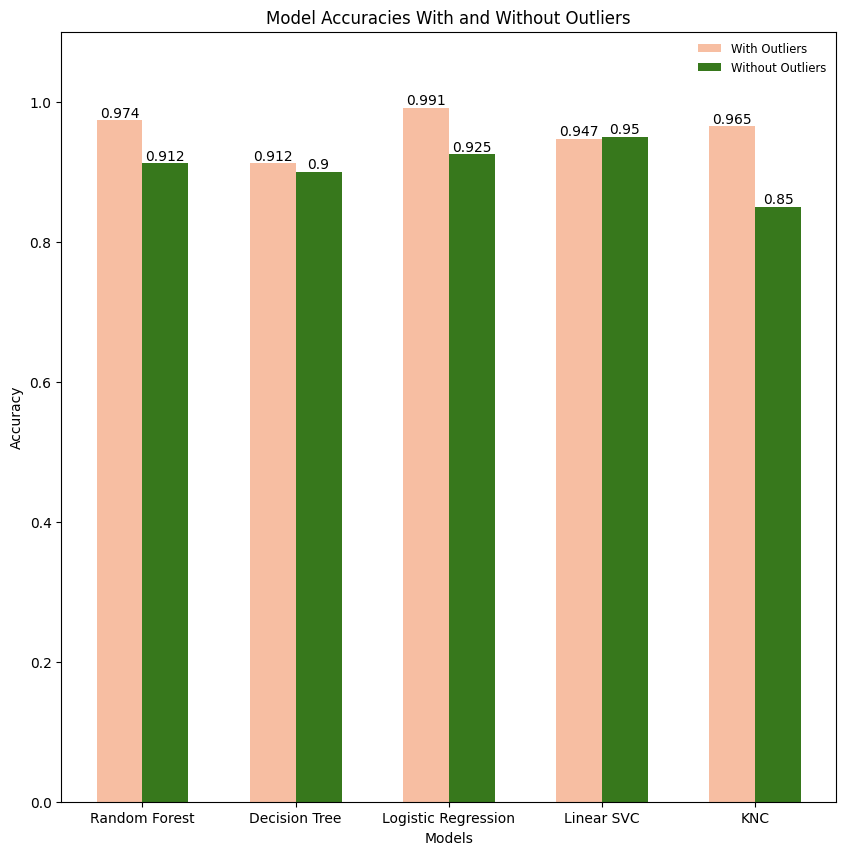

In [122]:
# Model names
models = ['Random Forest', 'Decision Tree', 'Logistic Regression', 'Linear SVC', 'KNC']

# Accuracies with and without outliers
with_outliers = [rf_accuracy, dt_accuracy, lr_accuracy, svc_accuracy, knc_accuracy]
without_outliers = [rf_accuracy_no, dt_accuracy_no, lr_accuracy_no, svc_accuracy_no, knc_accuracy_no]

# Position of bars on the X-axis
x = np.arange(len(models))

# Bar width
width = 0.3
colors = ['#f7bea2', '#37781c']  # coral for whole data, green for data with no outliers,2 f1b5d9'

# Plotting
plt.figure(figsize=(10,10))
bars1 = plt.bar(x - width/2, with_outliers, width=width, label='With Outliers', color = colors[0])
bars2 = plt.bar(x + width/2, without_outliers, width=width, label='Without Outliers', color = colors[1])

# Adding labels and title
plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.title('Model Accuracies With and Without Outliers')

# Adding model names to the x-axis
plt.xticks(x, models)
plt.ylim(0, 1.1)


# Adding value labels on top of bars
for bar in bars1 + bars2:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, yval, round(yval, 3), ha='center', va='bottom')

plt.legend(loc='best', fontsize='small', frameon=False)

plt.show()






.

.

.

.

.

.

.

.


This indicates that Highest Accuracy achieved by:
* Logistic Regression -> by training with the whole data
* Linear SVC -> by training with data after removing outliers

